<a href="https://colab.research.google.com/github/Yunho-seo/education_center5/blob/main/26_1_decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# SVD (singular value decomposition)
import numpy as np
from scipy import linalg
# [[1, 2, 3], [4, 5, 6]] 2x3 비정방행렬 => 특이행렬 분해
A = np.array([[1, 2, 3], [4, 5, 6]])
A

array([[1, 2, 3],
       [4, 5, 6]])

In [4]:
M, N = A.shape  # M : 행수, N : 열수
M, N

(2, 3)

In [5]:
# SVD : 특이값 분해, 주어진 행렬을 세 개의 행렬 곱으로 분해하는 기법
# U는 왼쪽 특이벡터 행렬, s는 특이값 배열, Vh는 오른쪽 특이벡터 전치행렬

U, s, Vh = linalg.svd(A)  # 행의 공분산에 대한 특징 / 고유치(분산의 크기) / 열에 대한 특징
Sig = linalg.diagsvd(s, M, N)  # s를 대각선으로 대치 / diagsvd() : 특이값 배열 s를 대각 행렬로 변환 (대각 행렬 : 대각 성분을 제외한 모든 요소가 0인 행렬)
Sig

# 데이터에 대해 고유값 분해를 하는 이유?
# 고유값 분해를 하게 된다면 고유벡터가 정직교하는 축을 만들어 데이터를 표현 고유치(분산의 크기)를 만든다. (데이터 이해)
# 직교하는 축으로 데이터를 재표현하게 된다면, 다중공선성을 분리시킬 수 있다.
# 상관계수, 공분산 -> 열을 대상으로 지정
# VH, U는 정직교하는 축이다.

array([[9.508032  , 0.        , 0.        ],
       [0.        , 0.77286964, 0.        ]])

In [9]:
s

array([9.508032  , 0.77286964])

In [8]:
U  # 2x2, 행의 특성

array([[-0.3863177 , -0.92236578],
       [-0.92236578,  0.3863177 ]])

In [7]:
Vh  # 3x3, 열의 특성

array([[-0.42866713, -0.56630692, -0.7039467 ],
       [ 0.80596391,  0.11238241, -0.58119908],
       [ 0.40824829, -0.81649658,  0.40824829]])

In [ ]:
U.dot(Sig.dot(Vh))  # 원래 데이터로 복원 (2x2 * 2x3 * 3x3 => 2x3) (2x3 원래 사이즈로 복원)
# 행렬곱 연산의 원칙
# : 앞의 행렬 열수와, 뒤의 행렬 행수가 일치해야 하고, 행렬곱 시 결과는 앞 행렬의 행수와 뒷 행렬의 열수
# 행렬곱하는 방법 : 내적 -> 요소끼리 곱하여 전부 더해주는 값이다. 
# 내적의 의미? : 두 벡터의 크기값을 고려한 사이각이다. (뒷 벡터에 앞 벡터가 투영하는 것이다)

In [18]:
# 차원축소 -> 특징을 추출 (목적: 노이즈를 없애고, 다중공선성을 분리)
# PCA : 정상적인 데이터인 경우 사용한다.
# TruncatedSVD : 희소행렬일 경우 사용한다.

from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import numpy as np
np.random.seed(0)
X_dense = np.random.rand(100, 100)  # 100x100 밀집행렬 X_dense 생성
X_dense[:, 2 * np.arange(50)] = 0  # 0부터 시작해서 짝수열을 0으로 (희소성을 부여)
# 희소행렬을 담는 매트릭스 
X = csr_matrix(X_dense) # Compressed Sparse Row matrix, 희소행렬로 변환하여 X에 할당 (TruncatedSVD 클래스는 희소행렬을 입력으로 받음)
# PCA에서 특징을 뽑을 때도 n_components
# 특징을 추출하는 TruncatesSVD(희소행렬로부터)
# 예를들어, 마트에서 물건을 구입할 때에나, 텍스트에서 단어를 이용해서 문장이나 책을 표현할 때 (DTM, TDM)
# 100x100 s 100x100
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)  # n_components() :주요 성분의 개수 / n_iter() : 특이값 분해 반복 횟수 / random_state() : 결과의 재현성을 위한 난수 시드
svd.fit(X)
print("분산설명: ", svd.explained_variance_ratio_)
print(svd.explained_variance_ratio_.sum())  # 21%를 5개의 특징이 설명
print(svd.singular_values_)

분산설명:  [0.01570766 0.05122679 0.04998062 0.04795064 0.04539933]
0.21026503465070345
[35.24105443  4.5981613   4.54200434  4.44866153  4.32887456]


In [19]:
# 어제 못한 kmeans 예제
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import seaborn as sns

iris = datasets.load_iris()
X = iris.data[:, :2]
y_iris = iris.target

In [32]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

def plot_kmeans(kmeans, X, n_clusters = 4, rseed = 0, ax = None):
  labels = kmeans.fit_predict(X)
  ax = ax or plt.gca()
  ax.axis = ('equal')
  ax.scatter(X[:, 0], X[:, -1], c=labels, s=40, cmap='viridis', zorder = 2)
  centers = kmeans.cluster_centers_  # k개의 중심으로 그룹화
  radii = [cdist(X[labels == i], [center]).max()  # 거리값 구하는 함수
    for i, center in enumerate(centers)]  # 반지름을 결합
  for c, r in zip(centers, radii):
    ax.add_patch(plt.Circle(c, r, fc="#CCCCCC", ec="#FF0000", lw = 3, alpha=0.5,
                            zorder = 1))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


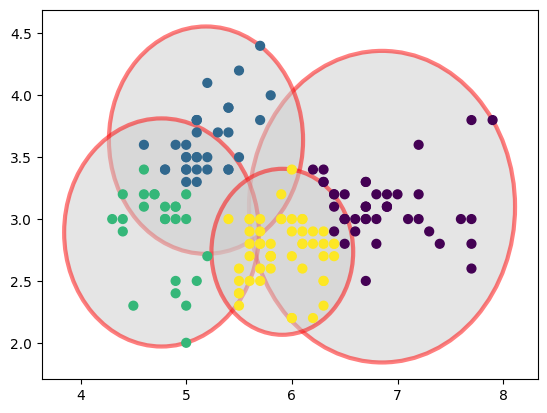

In [33]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

In [35]:
# 양자 벡터화

from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle  # shuffle() : 배열의 행을 섞는 함수 
from time import time
import numpy as np
n_colors = 64  # 클러스터링할 색상의 수 지정 (64개의 색상으로 이미지를 압축)

china = load_sample_image("china.jpg")
# 0 ~ 1 사이의 컬러값으로 변환
china = np.array(china, dtype = np.float64) / 255  # 부동소수점으로 표현 (이미지 정규화) (china는 Numpy 배열)
# 이미지는 기본적으로 3차원 / 동영상은 4차원 (초당 30 frame (29.7 frame))
w, h, d = original_shape = tuple(china.shape)  # china 배열의 크기를 저장 / w : 가로, h : 세로, d : 색상채널 수
print(w, h, d)  # d는 3바이트 (R, G, B)
image_array = np.reshape(china, (w * h, d))  # 컬러 값을 데이터로 바꿈.
t0 = time()  # 현재 시간을 측정
image_array_sample = shuffle(image_array, random_state = 0)[:1000]  # 색깔을 섞고 1000개 뽑기 / fit 시간을 단축
# 64개의 그룹 (비슷한 컬러값들의 모임)
# 각 그룹마다 center point가 생긴다 : 비슷한 컬러값들의 대표 컬러값 => 이미지를 64개의 컬러값으로 재표현 : 팔레트
# 재표현 시, 사이즈도 감소한다. -> 이미지를 라벨(label)로 표현 -> 이미지 압축의 기본 논리
# jpg 파일은 팔레트를 가지고 있음, 이미지를 전송할 때 헤더에 팔레트를 전송하고
# 이미지에 해당하는 부분에는 팔레트의 번호를 전송한다. => 이미지 사이즈가 줄어듬
kmeans = KMeans(n_clusters = n_colors, random_state = 0).fit(image_array_sample)  # 64개의 클러스터 생성
print("done in %0.3fs." % (time() - t0))  # 클러스터링 완료 후 경과된 시간을 출력

427 640 3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


done in 0.326s.


In [36]:
# 이미지 배열의 각 픽셀에 대한 클러스터 레이블을 예측

t0 = time()  # 시간 측정
labels = kmeans.predict(image_array)  # w * h개의 레이블이 생성 / image_array에 대한 클러스터 레이블 예측
print("done in %0.3fs." % (time() - t0))  # 클러스터 레이블 예측 완료까지 경과된 시간을 출력

done in 0.130s.


In [37]:
# 이미지 복원
# 코드북(컬러 팔레트 / 중심값), 레이블, 가로 크기, 세로 크기를 사용하여 이미지를 복원

def recreate_image(codebook, labels, w, h):
  d = codebook.shape[1]  # 64x 컬러값, 64x3 / 코드북의 두번째 차원 크기 (각 클러스터의 대표 색상 벡터의 차원수)
  image = np.zeros((w, h, d))  # 본래 이미지 사이즈로 공간 확보 / 크기가 (w, h, d)인 3차원 배열 생성
  label_idx = 0  # 레이블 인덱스 0으로 초기화
  for i in range(w):    # 가로방향 픽셀 인덱스인 i 반복
    for j in range(h):  # 세로방향 픽셀 인덱스인 j 반복
      image[i][j] = codebook[labels[label_idx]]  # image 배열의 (i, j) 위치에 코드북에서 해당하는 클러스터 레이블
                                                 # labels[label_idx]에 해당하는 색상 값 할당
      label_idx += 1  # 레이블 인덱스 1씩 증가
  return image

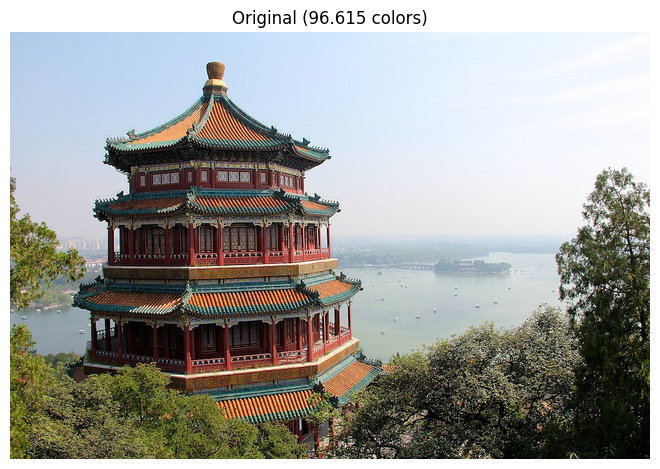

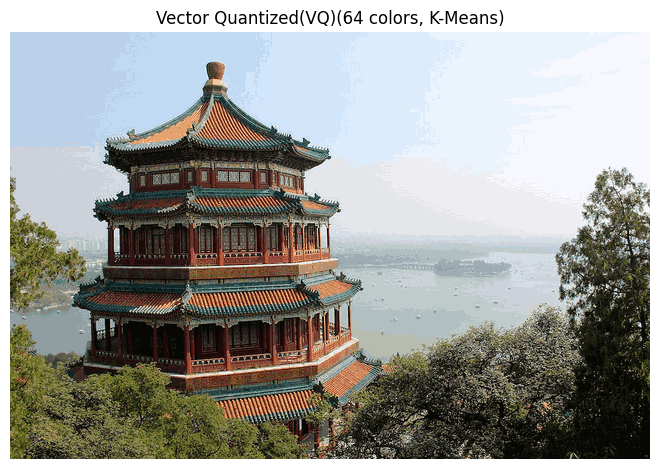

In [38]:
# 팔레트에 대표 컬러를 준비하고, 대표 컬러를 이용하여 비슷한 컬러를 표현한다.
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])  # 새로운 축 (axes) 객체 생성 (축의 위치와 크기를 정의)
plt.axis('off')
plt.title('Original (96.615 colors)')  # 원본 이미지 
plt.imshow(china)
plt.figure(2)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Vector Quantized(VQ)(64 colors, K-Means)')  # 벡터화된 이미지 (용량이 1/3으로 감소)
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))  # 클러스터 중심 배열 / 레이블 배열 / 가로 / 세로
# 원본 사진의 1/3 용량으로 이미지를 표현(복원)할 수 있다.

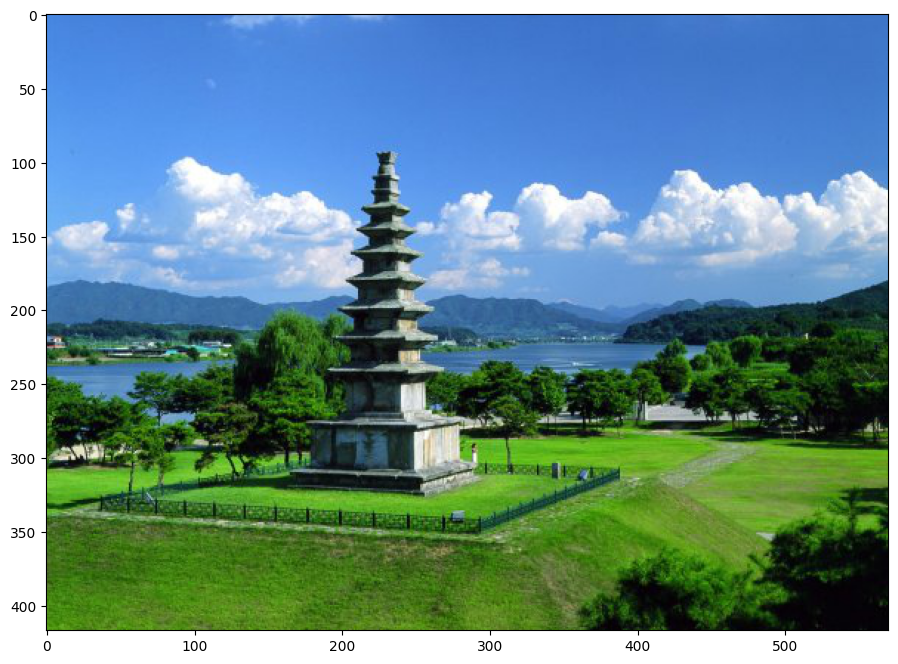

In [43]:
from sklearn import cluster
image = plt.imread("/content/drive/MyDrive/top.jpg")
plt.figure(figsize = (15, 8))
plt.imshow(image)

In [ ]:
# 문제
# 원하는 이미지를 다운받아서
# 중심값과 라벨값을 이용하여 이미지를 표현하고,
# 역으로 중심값과 라벨값을 이용하여 원래 이미지로 복원

In [45]:
import numpy as np
x, y, z = image.shape
image = np.array(image, dtype = np.float64) / 255
image_2d = image.reshape(x * y, z)
image_2d.shape

(237690, 3)

In [52]:
kmeans_cluster = cluster.KMeans(n_clusters = 16)
kmeans_cluster.fit(image_2d)
# 16 컬러
cluster_centers = kmeans_cluster.cluster_centers_
print(cluster_centers)
cluster_labels = kmeans_cluster.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[0.00189879 0.00261058 0.00341176]
 [0.00043561 0.00103938 0.00019452]
 [0.00124483 0.00202142 0.00049821]
 [0.00343926 0.00355642 0.00370457]
 [0.00119844 0.00210802 0.00342205]
 [0.00087771 0.00140956 0.00130884]
 [0.00014084 0.00030187 0.00017502]
 [0.00267461 0.00303116 0.00344843]
 [0.00142058 0.00239635 0.00368485]
 [0.00167915 0.00223498 0.00113592]
 [0.00041987 0.00076927 0.00073965]
 [0.00098182 0.00172979 0.00242111]
 [0.00088299 0.00162572 0.00033173]
 [0.00222393 0.0025272  0.00219822]
 [0.00159559 0.00264746 0.00062196]
 [0.00103661 0.00188324 0.00315724]]


In [ ]:
## 실행 안됨 ##
plt.figure(figsize = (15, 8))
plt.imshow(cluster_centers[cluster_labels].reshape(x, y, z))

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
(150, 5)


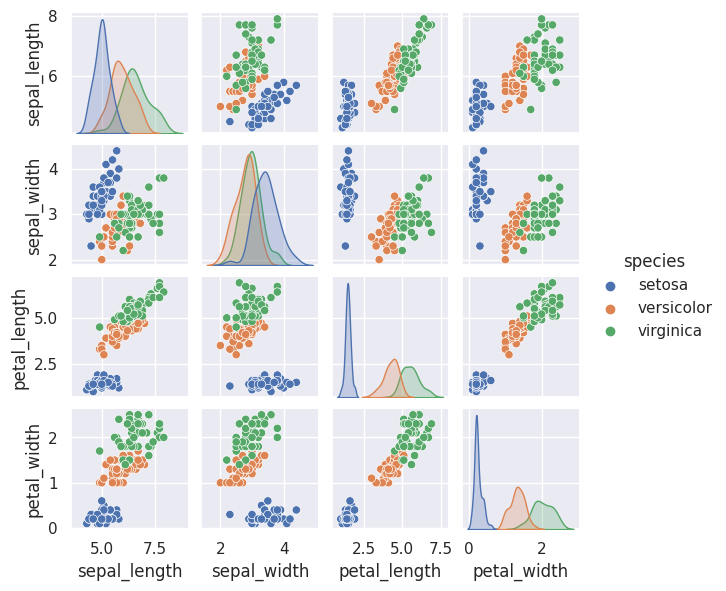

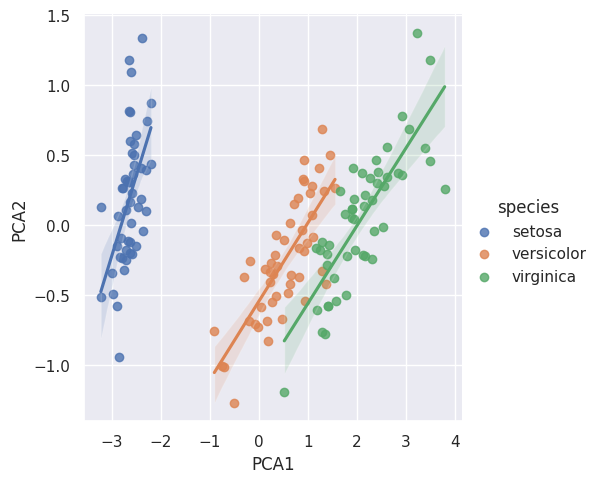

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
iris = sns.load_dataset('iris')
print(iris.head())
print(iris.shape)  # 150x5 (독립변수 4개, 종속변수 1개(species))
sns.pairplot(iris, hue='species', height = 1.5);  # 상관도 / 변수 간 상관관계를 시각화
X_iris = iris.iloc[:, :4]  # 독립변수 열만 선택 (PCA에 활용될 독립 변수)

from sklearn.decomposition import PCA
model = PCA(n_components = 4)  # 공분산, 상관계수 행렬 / PCA 모델 생성 (주성분 개수 : 4)
model.fit(X_iris)
X_2D = model.transform(X_iris)  # 150x4 / PCA 모델을 사용하여 X_iris 데이터를 주성분 공간으로 변환
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot(x = 'PCA1', y = 'PCA2', hue = 'species', data = iris, fit_reg = True)
plt.show()

In [61]:
import numpy as np
np.random.seed(4)
m = 60  # 데이터 갯수 (데이터 포인트)
w1, w2 = 0.1, 0.3  # 가중치 설정
noise = 0.1  # 노이즈 값 
angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5  # 크기가 m인 배열 angle / 각 요소는 0부터 3π/2 사이 난수 값
X = np.empty((m, 3))  # 크기가 (m, 3)인 빈 배열 생성
X[:, 0] = np.cos(angles) + np.sin(angles) / 2 + noise * np.random.randn(m) / 2  # 각도에 대한 코사인 값, 사인 값
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2  # 각도에 대한 사인 값을 0.7로 곱
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)  # 첫번째 열과 두번째 열의 값을 가중치와 곱
print("X.shape: ", X.shape)  # (60, 3), 60개의 데이터 포인트가 있고 각 데이터 포인트는 3개의 특성을 가짐 

X.shape:  (60, 3)


In [62]:
import pandas as pd
df = pd.DataFrame(X, columns=['$X_1$', '$X_2$', '$X_3$'])
df.head(10)  # 3x60

,$X_1$,$X_2$,$X_3$
0,-1.015700,-0.550913,-0.261326
1,-0.007717,0.599586,0.035078
2,-0.953171,-0.464537,-0.249203
3,-0.920123,0.210096,0.021824
4,-0.763097,0.158261,0.191525
5,1.118161,0.325087,0.317106
6,-1.022589,-0.643841,-0.133687
7,0.673520,-0.273425,-0.007878
8,1.016196,0.515466,0.467833
9,0.549577,0.677280,0.234016


In [63]:
X.mean(axis = 0)  # 열의 평균

array([0.02406745, 0.20932515, 0.07155422])

In [66]:
# 60x3 - 60x3 (브로드캐스팅, Broadcasting)
X_cen = X - X.mean(axis = 0)
X_cen.shape

(60, 3)

In [65]:
np.dot(X_cen.T, X_cen)  # (전치로 인한 3x60) (60, 3) => (3x3 행렬이 됨)
# 거듭제곱 -> 정방행렬 -> 대칭행렬
# 공분산 행렬 (원래의 사이즈를 가지고 있음)

array([[41.18958451, 10.40791818,  7.16137913],
       [10.40791818, 10.63018922,  4.27963197],
       [ 7.16137913,  4.27963197,  2.68590523]])

In [67]:
# 공분산 행렬
# 공분산 : 2개의 확률변수의 상관 정도를 나타내는 값
# 공분산의 수식 : sigma((Xi - Xbar) * (Yi - Ybar)) / (n-1)  # 요소끼리 곱해서 다 더해준 값
X_cov = np.dot(X_cen.T, X_cen) / 59
print(X_cov)

[[0.69812855 0.17640539 0.12137931]
 [0.17640539 0.1801727  0.07253614]
 [0.12137931 0.07253614 0.04552382]]


In [68]:
np.cov(X_cen.T)

array([[0.69812855, 0.17640539, 0.12137931],
       [0.17640539, 0.1801727 , 0.07253614],
       [0.12137931, 0.07253614, 0.04552382]])

In [69]:
w, v = np.linalg.eig(X_cov)  # 공분산 행렬에 대한 고유값 분해

print('eigenvalue :', w)   # 고유치 (각 축으로의 분산 크기) (분산이 큰것이 주성분)
print('eigenvector :', v)  # 고유벡터
# 분산의 크기가 변수중요도를 결정 -> 설명력

eigenvalue : [0.77830975 0.1351726  0.01034272]
eigenvector : [[ 0.93636116  0.34027485 -0.08626012]
 [ 0.29854881 -0.90119108 -0.31420255]
 [ 0.18465208 -0.2684542   0.94542898]]


In [70]:
print("설명력: ", w / w.sum())

설명력:  [0.84248607 0.14631839 0.01119554]


In [73]:
U, D, V_t = np.linalg.svd(X_cen)  # 중심화된 데이터 X_cen의 특이값 분해
print(U.shape, D.shape, V_t.shape)  # 각각의 변수 크기(shape) 출력
D

(60, 60) (3,) (3, 3)


array([6.77645005, 2.82403671, 0.78116597])

In [74]:
print("explained variance ratio:", D ** 2 / np.sum(D ** 2))  # 분산의 비율 (각 주성분이 전체 V에서 차지하는 비중)

explained variance ratio: [0.84248607 0.14631839 0.01119554]


In [75]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca.fit(X)

PCA(n_components=3)

In [76]:
print("singular value :", pca.singular_values_)
print("singular vector : \n", pca.components_.T)

singular value : [6.77645005 2.82403671 0.78116597]
singular vector : 
 [[-0.93636116  0.34027485 -0.08626012]
 [-0.29854881 -0.90119108 -0.31420255]
 [-0.18465208 -0.2684542   0.94542898]]


In [77]:
print("eigen_value :", pca.explained_variance_)
print("explained variance ratio :", pca.explained_variance_ratio_)

eigen_value : [0.77830975 0.1351726  0.01034272]
explained variance ratio : [0.84248607 0.14631839 0.01119554]


In [79]:
cumsum = np.cumsum(pca.explained_variance_ratio_)  # 주성분의 분산의 누적합을 계산 
print(cumsum)
d = np.argmax(cumsum >= 0.85) + 1  # 누적합이 0.85 이상인 첫번째 인덱스 찾고 1을 더하여 선택할 차원 수(d) 결정
print("선택할 차원 수: ", d)  # d는 설명된 분산이 85% 이상인 차원 수

[0.84248607 0.98880446 1.        ]
선택할 차원 수:  2


In [81]:
pca = PCA(n_components = 0.95)  # 변수 선택
X_proj = pca.fit_transform(X)
pca.components_.T

array([[-0.93636116,  0.34027485],
       [-0.29854881, -0.90119108],
       [-0.18465208, -0.2684542 ]])

In [82]:
# Keras + tensorflow(신경망에 layer를 추가)
import tensorflow as tf
tf.__version__

'2.12.0'

In [83]:
from tensorflow.keras.datasets import mnist  # mnist : 숫자 데이터(수기)
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# train 데이터는 약 50,000장, test 데이터는 약 10,000장 : 다운로드
# 28x28 흑백이미지 (2차원)
(train_x, train_y), (test_x, test_y) = mnist.load_data()  # 훈련 이미지, 데이터 / 테스트 이미지, 레이블 데이터

11490434/11490434 [==============================] - 1s 0us/step


In [86]:
# mnist 데이터셋을 PCA를 사용하여 차원 축소
train_x = train_x.reshape(-1, 28*28)  # fully-connected, 하나의 행으로 표현
pca = PCA(n_components = 0.95)  # 주성분의 설명된 분산이 95 % 이상이 되는 차원만 선택
X_reduced = pca.fit_transform(train_x)  # 차원 축소
print(pca.n_components_)  # 784 -> 154개 / 784개의 특성 중 주성분 분석을 통해 95% 이상의 설명된 분산을 가지는 주성분

154


In [87]:
train_x.shape  # (60000, 784)

(60000, 784)

In [88]:
X_reduced.shape  # (60000, 154)

(60000, 154)

In [89]:
pca.components_.shape  # (154, 784) / 주성분의 방향 벡터 (n_components, n_features) : 선택된 주성분수, 원본데이터 특성수

(154, 784)

In [90]:
# PCA 적용 후 주성분에 해당하는 새로운 특성들을 사용하여 원본 데이터를 재구성
# @ 연산자는 행렬의 곱셈
# 차원 축소된 데이터를 다시 원본 데이터 차원으로 복원
train_x @ pca.components_.T

array([[ 880.73143303, -329.95076555,  197.60632371, ...,   54.97192902,
         -19.29952488,   39.69503957],
       [1768.51722024, -312.13354179,  818.4599365 , ...,    7.19422984,
         -11.67405929,  -12.63814332],
       [ 704.94923633,  374.89664934,   33.61062603, ...,  -54.24289111,
          49.26354687,  -73.17317528],
       ...,
       [ 578.74539477,  142.80170756,  -35.4927068 , ...,   55.49778647,
          88.78258496,   -5.68471007],
       [ 887.40491646,  -22.86843995,  735.97904942, ...,   23.26128512,
           5.84612776,  -65.16016859],
       [ 583.36289193,  -41.99530579,  778.13926939, ...,   52.44853801,
          13.41567232,  -45.63492499]])

In [91]:
# 문제
# X_reduced
# 154개의 특징으로 추출된 데이터를 원래의 이미지 사이즈로 복원
X_recovered = pca.inverse_transform(X_reduced)  # 역변환 (차원 축소된 데이터 -> 원본 차원으로 복원)
X_recovered

array([[ 2.64687454e-14, -5.81302016e-13, -1.79499509e-13, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.64609603e-15, -1.67996410e-13, -5.11041518e-14, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.28377776e-15,  8.10470042e-14, -9.30589413e-14, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 8.88183138e-15, -1.81564119e-13,  6.04953780e-14, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.07364675e-16,  4.46563152e-14, -5.45605406e-15, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.73667409e-15,  2.11325954e-14,  1.25009063e-14, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [92]:
X_recovered.shape  # (60000, 784) / 노이즈가 없어진 상태에서 복원된 이미지 / 원본 데이터와 동일한 형태

(60000, 784)

In [93]:
# components_ 변환행렬 
(train_x @ pca.components_.T).shape  # 변환 데이터 (변환행렬)

(60000, 154)

In [94]:
X_reduced @ pca.components_  # 원래의 이미지를 복원 / 차원 축소된 데이터를 주성분의 방향 벡터 사용하여 복원

array([[ 2.64687454e-14, -5.81302016e-13, -1.79499509e-13, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.64609603e-15, -1.67996410e-13, -5.11041518e-14, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.28377776e-15,  8.10470042e-14, -9.30589413e-14, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 8.88183138e-15, -1.81564119e-13,  6.04953780e-14, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.07364675e-16,  4.46563152e-14, -5.45605406e-15, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.73667409e-15,  2.11325954e-14,  1.25009063e-14, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [96]:
# 숫자 이미지를 시각화하는 ploy_digits 함수
# 변동 이미지 사이즈에, 한 행에 5개씩 분할하면서 이미지화
import matplotlib
def plot_digits(instances, images_per_row = 5, **options):  # 이미지 담고 있는 리스트 / 한 행에 이미지 5개씩 표시
  size = 28  # 원래의 이미지 사이즈의 한 축 / 이미지의 크기 (디폴트가 28) 
  images_per_row = min(len(instances), images_per_row)  # 5장 이하인 경우를 확인
  # 리스트의 각 이미지를 크기에 맞게 재구성한 리스트 'images'
  images = [instance.reshape(size, size) for instance in instances]  # 원래의 이미지 사이즈로 복원
  n_rows = (len(instances) - 1) // images_per_row + 1  # 행을 결정 / 행의 수를 계산 (몫 + 1)
  row_images = []  # 5장의 이미지를 묶어서 한 장으로 만드는 것 / 각 행에 표시할 이미지들을 담는 리스트
  n_empty = n_rows * images_per_row - len(instances)  # 전체 이미지 사이즈에 해당되는 빈 공간 / 마지막 행에 표시할 빈 이미지의 수
  images.append(np.zeros((size, size * n_empty)))  # 모든 행과 열을 연결, 하나의 이미지로 만듦
  for row in range(n_rows):  # 이미지를 행 단위로 분할, row 변수는 행의 인덱스 / 행 수만큼 반복
    rimages = images[row * images_per_row : (row+1) * images_per_row]  # 행에 표시할 이미지들을 담는 리스트
    # row * images_per_row부터 (row+1) * images_per_row 까지의 범위에 있는 리스트들이 현재 행에 있는 이미지
    row_images.append(np.concatenate(rimages, axis = 1))  # 한 행의 이미지
  image = np.concatenate(row_images, axis = 0)
  plt.imshow(image, cmap = matplotlib.cm.binary, **options)  # 이미지를 시각화
  plt.axis('off')

In [99]:
# 60000 / 2100 = 28.571428571428573 => 29장

28.571428571428573

Text(0.5, 1.0, 'no noise')

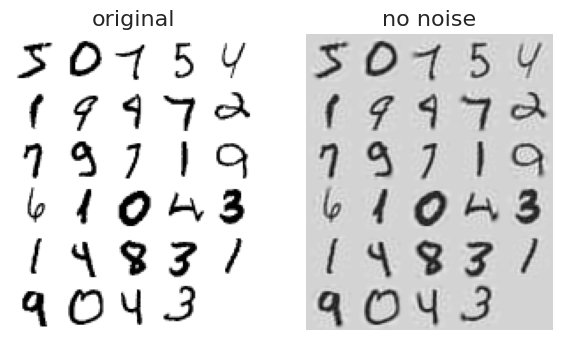

In [97]:
import numpy as np
plt.figure(figsize = (7, 4))
plt.subplot(121)
plot_digits(train_x[::2100])
plt.title('original', fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title('no noise', fontsize = 16)

In [100]:
# MDS (Multi Dimension Scale)

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

def make_hello(N=1000, rseed=42):
    fig, ax = plt.subplots(figsize=(4, 1))  # 4x1인 그림(fig), 축(ax) 생성
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)  # Hello 텍스트가 중앙에 위치
    ax.axis('off')  # 축의 눈금과 레이블 비활성화
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')  # 그림을 png 파일로 저장
    plt.close(fig)    

    from matplotlib.image import imread  # 이미지 읽어오기
    data = imread('hello.png')[::-1, :, 0].T  # 읽어온 이미지의 행과 열 반전시키고 첫번째 채널을 선택
    print("이미지차원", data.shape)  # 288 x72
   
    print(data)
    rng = np.random.RandomState(rseed)  # 난수 생성기 
    X = rng.rand(4 * N, 2)  # 0 ~ 1 사이 무작위한 수로 이루어진 (4 * N, 2) 크기의 배열 X 생성 
    print("만든 갯수",X.shape)
    print((X * data.shape).shape)
    i, j = (X * data.shape).astype(int).T  # X 배열을 i, j 배열로 분할 후 정수로 변환
   
    mask = (data[i, j] < 1)  # i, j 값을 사용하여 해당 좌표의 픽셀값이 1보다 작은지 확인하는 마스크 생성
    X = X[mask]  # 마스크 사용하여 X 배열에 해당하는 데이터포인트 선택
    print("새로운 X 갯수", X.shape)
    print("원래이미지의 차수 ", data.shape)
    X[:, 0] *= (data.shape[0] / data.shape[1])  # X 배열의 첫번째 열의 값을 이미지 데이터의 종횡비 반영하여 조정
    X = X[:N]  # N 개수, 데이터포인트

    return X[np.argsort(X[:, 0])]

이미지차원 (400, 100)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
만든 갯수 (4000, 2)
(4000, 2)
새로운X갯수 (1784, 2)
원래이미지의 차수  (400, 100)


<ipython-input-101-f575738a7d10>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colorize = dict(c = X[:, 0], cmap = plt.cm.get_cmap('rainbow', 5))


(-0.19972965643412033,
 4.195346643588747,
 0.02244321091604335,
 0.990457146590137)

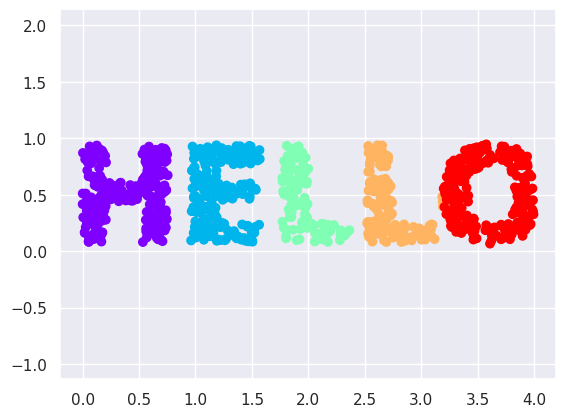

In [101]:
# 시각화
X = make_hello(1000)
colorize = dict(c = X[:, 0], cmap = plt.cm.get_cmap('rainbow', 5))  # c : x좌표값, cmap에서는 컬러맵 사용 (5개 색상 생성)

plt.scatter(X[:, 0], X[:, 1], **colorize)  # scatter()로 데이터 포인트를 산점도로 표시
# X[:, 0]을 x좌표, X[:, 1]을 y좌표로 설정
plt.axis('equal')  # x와 y축 스케일을 같게 설정 (원형 모양을 유지)

(1000, 2)
<class 'list'>


(4.507487053249943, 8.845503039218586, 4.991879306174322, 7.269254509788998)

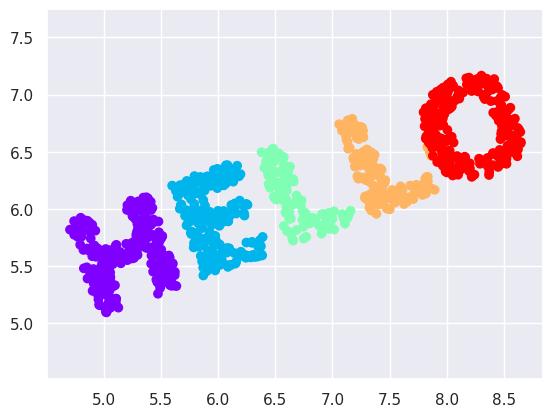

In [102]:
# rotate 함수 : 데이터포인트 X를 각도에 따라 회전시키는 함수

print(X.shape)
def rotate(X, angle):
  theta = np.deg2rad(angle)  # 각도를 라디안으로 변환 (호의 길이)
  R = [[np.cos(theta), np.sin(theta)],   # 회전행렬 R 생성, np.cos(theta)는 코사인 값, np.sin(theta)는 사인 값
       [-np.sin(theta), np.cos(theta)]]  # 반시계방향으로 데이터 회전 시키기
  print(type(R))
  return np.dot(X, R)  # np.dot() : 데이터 포인트 X와 회전행렬 R을 곱하여 회전된 데이터 포인트 반환
X2 = rotate(X, 20) + 5  # X 데이터를 20도만큼 회전시키고 각 좌표에 5을 더하여 X2 변수에 저장
                        # 회전된 데이터의 좌표를 이동시켜 산점도에서 원점에서 멀리 위치하도록 설정
plt.scatter(X2[:, 0], X2[:, 1], **colorize)  # X2 데이터를 산점도로 표시, x 좌표와 y 좌표
plt.axis('equal')  # x 축과 y 축의 스케일을 같게 조정

In [ ]:
# 데이터에 대하여 선형변환 : MRS 하면, 원래의 모양이 유지 (거리값이 유지됨)

In [104]:
# 특별한 행렬 : 공분산 행렬, 상관계수 행렬, 거리 행렬
# 정방행렬이면서 대칭행렬인 경우 전치행렬이 역행렬이다.
# 정방행렬이면서 대칭행렬인 경우, 고유값 분해를 하면 고유치와 고유벡터가 생성된다.

from sklearn.metrics import pairwise_distances  # 주어진 데이터의 쌍 간 거리를 계산하는 함수
D = pairwise_distances(X)  # X 데이터 포인트의 쌍 간 거리 계산하여 거리행렬 D를 만든다 (유클리드 거리)
print(D.shape)  # 거리행렬 D의 크기 출력 (1000, 1000) / 데이터 포인트는 1000개
D[:5, :5]  # 거리행렬 D의 5x5 출력 (첫 5개 데이터 포인트 사이 거리, 부분행렬)

(1000, 1000)


array([[0.        , 0.09456459, 0.45411046, 0.11688862, 0.25021892],
       [0.09456459, 0.        , 0.35954588, 0.21138485, 0.34459142],
       [0.45411046, 0.35954588, 0.        , 0.57087538, 0.70387239],
       [0.11688862, 0.21138485, 0.57087538, 0.        , 0.13339179],
       [0.25021892, 0.34459142, 0.70387239, 0.13339179, 0.        ]])

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


[[-1.73423439 -0.81745868]
 [-1.689606   -0.90184291]
 [-1.5207988  -1.22000565]
 ...
 [ 1.81414877  1.00868682]
 [ 1.76758478  1.09837085]
 [ 1.75972301  1.12145007]]


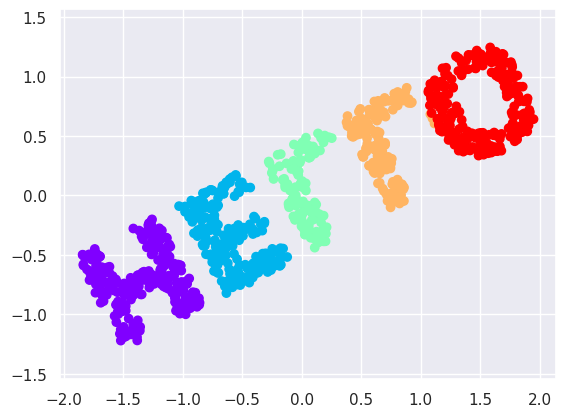

In [105]:
# MDS (다차원 척도법) : 거리 행렬로부터 저차원 공간으로의 매핑을 수행하는 알고리즘

from sklearn.manifold import MDS
# 입력 데이터가 거리행렬
# MDS 모델 생성 / n_components는 저차원 공간의 차원수 / 입력 데이터로 거리행렬 사용 / 난수 시드
model = MDS(n_components = 2, dissimilarity = 'precomputed', random_state = 1)
out = model.fit_transform(D)  # inverse_transform이 없다. / 저차원 공간으로의 매핑(Mapping), out은 저차원 공간의 좌표
plt.scatter(out[:, 0], out[:, 1], **colorize)  # out 배열의 첫번째 열은 x 좌표, 두번째 열을 y좌표로 함
plt.axis('equal')
print(out)  # X를 저차원 공간으로 매핑한 결과 / (N, 2) 형태로, 각 데이터 포인트의 2차원 좌표

In [106]:
import numpy as np
rng = np.random.RandomState(10)  # 시드 값이 10인 난수 생성기를 생성
C = rng.randn(3, 3)  # 3x3인 표준 정규분포를 따르는 난수로 채워진 'C' 배열
# 행렬 C와 전치행렬 C.T의 곱을 계산 (정방행렬의 공분산 행렬을 구하는 연산)
print(np.dot(C, C.T))  # 거듭제곱 => 정방행렬이면서 전치행렬

e, V = np.linalg.eigh(np.dot(C, C.T))  # np.linalg.eigh() : 정방행렬의 고유값과 고유벡터를 계산,
                                       # np.dot(C, C.T) : 입력으로 공분산 행렬이 사용됨
                                       # e는 고유값(1차원), V는 고유벡터(2차원)
print("eigenvector", V)  # 직교 / 고유벡터
print("eigenvalue", e)   # 고유값

print(np.dot(V[0], V[1]))  # 행으로 행렬곱 : 0 -> 직교한다. / 첫번째 고유벡터와 두번째 고유벡터의 내적을 계산
print(np.dot(V[:, 0], V[:, 1]))  # 열로 행렬곱 : 0 -> 직교한다. / 첫번째, 두번째 고유벡터 내적 (열로 행렬곱)

[[4.67300869 1.54608517 0.42456214]
 [1.54608517 0.9046519  0.0621289 ]
 [0.42456214 0.0621289  0.0822976 ]]
eigenvector [[-0.15797077 -0.30570231 -0.93893095]
 [ 0.20981122  0.9187662  -0.33443672]
 [ 0.9648961  -0.24982947 -0.08099843]]
eigenvalue [0.02629875 0.37332691 5.26033253]
5.551115123125783e-17
-8.326672684688674e-17


In [107]:
# 전체 행렬이 역행렬인지 어떻게 확인?
# 행렬 @ 역행렬 = 단위행렬

# 정방행렬이면서 대칭행렬인 행렬은, 전치행렬이 곧 역행렬이다.

In [108]:
V @ V.T  # 결과가 단위행렬 (대각선이 1, 나머지는 0) / V.T는 곧 전치행렬이지만 역행렬
         # 고유벡터 행렬 V와 전치행렬인 V.T의 곱을 계산 -> 고유벡터들로 재구성된 공분산 행렬을 나타냄

array([[ 1.00000000e+00,  5.68030769e-17,  6.46648563e-17],
       [ 5.68030769e-17,  1.00000000e+00, -9.68146795e-17],
       [ 6.46648563e-17, -9.68146795e-17,  1.00000000e+00]])

In [109]:
V @ np.linalg.inv(V)  # 결과가 단위행렬
                      # 고유벡터 행렬 V와 그 역행렬인 np.linalg.inv(V)의 곱을 계산 (역변환)

array([[ 1.00000000e+00, -4.40491859e-17,  1.08487117e-17],
       [-5.49542318e-17,  1.00000000e+00, -5.48320167e-18],
       [-1.70465154e-17,  2.84742496e-17,  1.00000000e+00]])

In [111]:
# 다차원으로 랜덤한 수를 이용해서 축을 만든다음, 변환한다. 
# hello는 2차원 데이터
# 입력 데이터 X를 주어진 차원으로 무작위 투영
def random_projection(X, dimension = 3, rseed = 42):
  assert dimension >= X.shape[1]  # X의 차원이 주어진 차원(dimension)보다 작거나 같은지 확인 (작으면 투영 X)
  rng = np.random.RandomState(rseed)  # 시드를 설정
  C = rng.randn(dimension, dimension)  # 정규분포를 따르는 난수로 구성된 행렬 생성 
  print("C는 ", C.shape)
  print(np.dot(C, C.T))  # 행렬 C와 전치행렬 곱을 계산하여 공분산 행렬 생성 / 정방행렬이면서 대칭행렬
  e, V = np.linalg.eigh(np.dot(C, C.T))  # 공분산 행렬의 고유값 + 고유벡터가 계산되고 출력된다.
  print("V는 ", V.shape)
  print("차원은 ", V[:X.shape[1]])  # 행수를 X의 열수로 제한 : 이유는 행렬곱

  return np.dot(X, V[:X.shape[1]])  # 열의 수 / 입력 데이터 X와 선택된 고유벡터를 행렬곱하여 투영된 데이터 계산

print(X.shape)
print(X.shape[1])
print("데이터의 차원은 ", X.shape)
X3 = random_projection(X, 3)  # X를 주어진 차원으로 무작위 투영
X3.shape  # (1000, 3)

(1000, 2)
2
데이터의 차원은  (1000, 2)
C는  (3, 3)
[[0.68534241 0.63723771 0.37423535]
 [0.63723771 2.42926786 2.33541214]
 [0.37423535 2.33541214 3.30327538]]
V는  (3, 3)
차원은  [[-0.63360361  0.75939282  0.14788172]
 [ 0.64803399  0.41652241  0.63762139]]


(1000, 3)

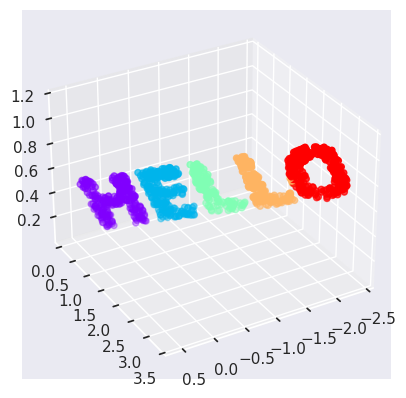

In [112]:
# 3차원으로 변환 (3차원 산점도 생성하여 데이터 시각화)
from mpl_toolkits import mplot3d
ax = plt.axes(projection = '3d')  # 3D 축을 가진 새로운 축 객체 ax를 생성
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2], **colorize)  # 산점도 그리기, 각각 x, y, z 좌표
ax.view_init(azim = 60, elev = 30)  # 시각화의 시야 설정
                                    # azim은 시야의 방위각, elev은 시야의 고도각

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


(-2.0314683289212114,
 2.1390500907532832,
 -1.3432561900442952,
 1.3682556159800632)

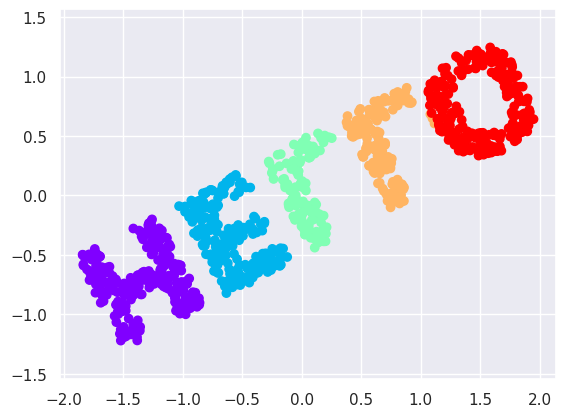

In [118]:
# 다시 2차원으로 변환
# MDS를 이용하여 차원 축소를 하여도, 원래의 거리값을 유지한다.

# 3차원 데이터를 MDS 알고리즘을 통해 2차원으로 축소한 후 시각화
model = MDS(n_components = 2, random_state = 1)  # n_components = 2 : 2차원으로 축소, random_state = 1 : 결과 재현 가능하도록 한다.
out3 = model.fit_transform(X3)  # 3차원 데이터 X3를 2차원으로 축소한다. (fit_transform())
plt.scatter(out3[:, 0], out3[:, 1], **colorize)  # 축소된 2차원 데이터를 산점도로 시각화 / 각각 x, y 좌표
plt.axis('equal')  # x와 y축 스케일을 동일하게 설정 (차원 축소된 데이터를 정확하게 시각화하기 위해 사용)

In [127]:
# 비선형 변환
def make_hello_s_curve(X):  # 2차원 데이터 X를 사용하여 'S'자 형태의 곡선 데이터를 생성하는 함수
    t = (X[:, 0] -2) * 0.75 * np.pi  # x 좌표 변형 (첫번째 열 : x좌표), t는 x 좌표를 변형하여 구한 값
    x = np.sin(t)  # x 좌표 설정 -> np.sin()를 통해 t값을 sin 함수에 적용하여 계산
    y = X[:, 1]    # y 좌표 설정 (X[:, 1]은 데이터의 두번째 열)
    z = np.sign(t) * (np.cos(t) -1)  # z 좌표 설정 (np.sign(t): t값의 부호 결정 / np.cos()와 연산하여 z 좌표 계산)
    print('z값', np.ptp(x))  # np.ptp() : 각 좌표 축의 범위를 확인하는 함수 
    print('x값', np.ptp(y))
    print('y값', np.ptp(z))
    return np.vstack((x,y,z)).T  # x, y, z 좌표를 수직으로 쌓아 3차원 데이터 생성 

XS = make_hello_s_curve(X)  # 'S'자 형태의 곡선을 나타내는 데이터 

z값 1.9999961272919269
x값 0.8800126687946306
y값 3.999970622756973


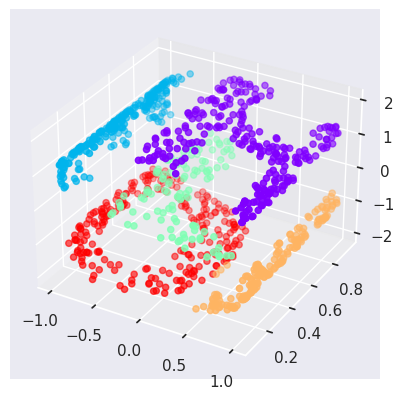

In [128]:
ax = plt.axes(projection = '3d')  # 3D 그래프를 생성하기 위한 axes 객체 생성
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2], **colorize)  # 각각 x, y, z 좌표로 하여 3D 산점도를 그린다.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


(-1.7542649693704555,
 1.7171533174441027,
 -2.253133416776031,
 2.0016781872998273)

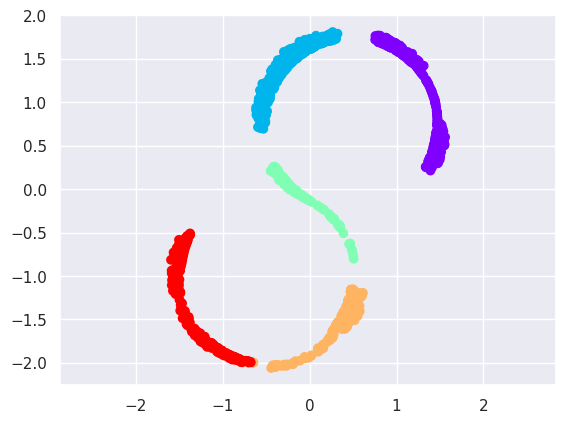

In [129]:
# 비선형 변환을 MDS하면, 원래의 거리를 유지하지 못한다.
model = MDS(n_components = 2, random_state = 2)  # MDS 모델 생성 (2차원으로 축소하여 표현하도록 지정)
outS = model.fit_transform(XS)  # XS에 대해 MDS 알고리즘 수행하여 2차원으로 축소된 결과 반환
plt.scatter(outS[:, 0], outS[:, 1], **colorize)  # 2차원 축소된 결과인 outS 배열의 첫번째 열 : x좌표, 두번째 열 : y좌표
plt.axis('equal')

(0.15, -0.15)

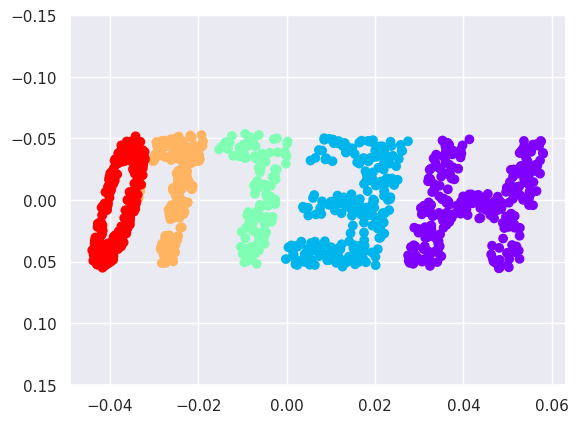

In [130]:
# LLE (Locally Linear Embedding) 비선형 데이터에 강건하다.
# 비선형 데이터를 저차원으로 임베딩하기 위한 알고리즘
# 선형적이지 않은 매니폴드(manifold) 구조를 가지는 데이터에 적용
# 비선형 데이터의 시각화나 패턴 인식 등에 사용
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors = 100, n_components = 2, method = 'modified',
                               eigen_solver = 'dense')
# n_neighbors=100 : 각 데이터포인트 주변에 고려할 이웃의 수가 100개, n_components = 2차원으로 변환할 것
# method = modified : LLE 알고리즘의 modified 방법, eigen_solver = dense : 고유값 계산에 사용하려는 방법
out = model.fit_transform(XS)  # LLE 알고리즘을 사용하여 XS 배열을 저차원으로 임베딩한 결과 반환
fig, ax = plt.subplots()  # 새로운 Figure, axes 객체 생성 
ax.scatter(out[:, 0], out[:, 1], **colorize)  # 2차원으로 임베딩한 결과인 out 배열의 첫번째 열(x), 두번째 열(y)로 산점도 그리기
ax.set_ylim(0.15, -0.15)  # y축의 범위 지정